## Pandas-Profiling

## Load Data

In [2]:
import pandas as pd
import pandas_profiling

In [3]:
df_wine=pd.read_csv("winequality-red.csv", parse_dates=True, encoding='UTF-8')

## Pandas Profilingを使う

In [4]:
pandas_profiling.ProfileReport(df_wine)

Number of variables,12
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,150.0 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [5]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


## Select Features by Random Forest

決定木やランダムフォレストなどのツリーモデルでは、特徴量を標準化または正規化する必要性はない。<br>

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[0:11]

In [15]:
# 特徴量
feat_labels

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [23]:
# インスタンスの作成
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [38]:
# 特徴量の選択
X = df_wine.iloc[:, 0:11].values

In [39]:
# 目的変数の選択
y = df_wine.iloc[:, 11].values

In [41]:
# 訓練
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [70]:
# 重要度のリスト
importances = forest.feature_importances_

In [71]:
importances

array([ 0.07604228,  0.10462016,  0.07253241,  0.06996722,  0.081227  ,
        0.06741682,  0.10421359,  0.09240258,  0.07520682,  0.11089406,
        0.14547705])

In [75]:
feat_labels_list = list(feat_labels)

In [76]:
feat_labels_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [78]:
importances_dict = dict(zip(feat_labels_list, importances))

In [82]:
importances_dict

{'alcohol': 0.1454770489823255,
 'chlorides': 0.081227003736950645,
 'citric acid': 0.072532413894645487,
 'density': 0.092402583454643708,
 'fixed acidity': 0.076042276357046232,
 'free sulfur dioxide': 0.067416816252535539,
 'pH': 0.075206824917785034,
 'residual sugar': 0.069967219542782566,
 'sulphates': 0.11089406056639023,
 'total sulfur dioxide': 0.10421359318678622,
 'volatile acidity': 0.10462015910810872}

In [83]:
from pandas import Series
ser = Series(importances_dict)

In [85]:
ser = ser.sort_values(ascending=False)

In [86]:
ser

alcohol                 0.145477
sulphates               0.110894
volatile acidity        0.104620
total sulfur dioxide    0.104214
density                 0.092403
chlorides               0.081227
fixed acidity           0.076042
pH                      0.075207
citric acid             0.072532
residual sugar          0.069967
free sulfur dioxide     0.067417
dtype: float64

In [91]:
x = list(ser.index)

In [92]:
x

['alcohol',
 'sulphates',
 'volatile acidity',
 'total sulfur dioxide',
 'density',
 'chlorides',
 'fixed acidity',
 'pH',
 'citric acid',
 'residual sugar',
 'free sulfur dioxide']

In [93]:
y = ser.values

In [97]:
data = {'feature':x, 'importances':y}

In [100]:
import pandas as pd
from pandas import Series, DataFrame

data = DataFrame(data)

In [101]:
data

,feature,importances
0,alcohol,0.145477
1,sulphates,0.110894
2,volatile acidity,0.104620
3,total sulfur dioxide,0.104214
4,density,0.092403
5,chlorides,0.081227
6,fixed acidity,0.076042
7,pH,0.075207
8,citric acid,0.072532
9,residual sugar,0.069967


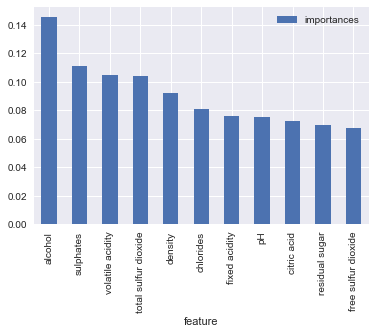

In [119]:
data.plot.bar(x='feature',y='importances')